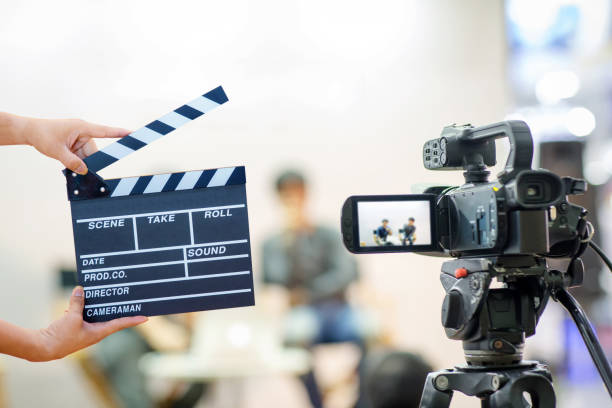

In [1]:
from IPython.display import Image, display

image_path = '123.jpg'
display(Image(filename=image_path))


# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_data = pd.read_csv('C:\\Users\\Mubasshira\\Downloads\\train_data.txt', sep = ':::', engine = 'python',
                         names=['Title','Genre','Description'])

train_data.head()

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [4]:
test_data = pd.read_csv('C:\\Users\\Mubasshira\\Downloads\\test_data.txt', sep = ':::', engine = 'python',
                         names=['Title','Genre','Description'])

test_data.head()

,Title,Genre,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


Text(0, 0.5, 'Count')

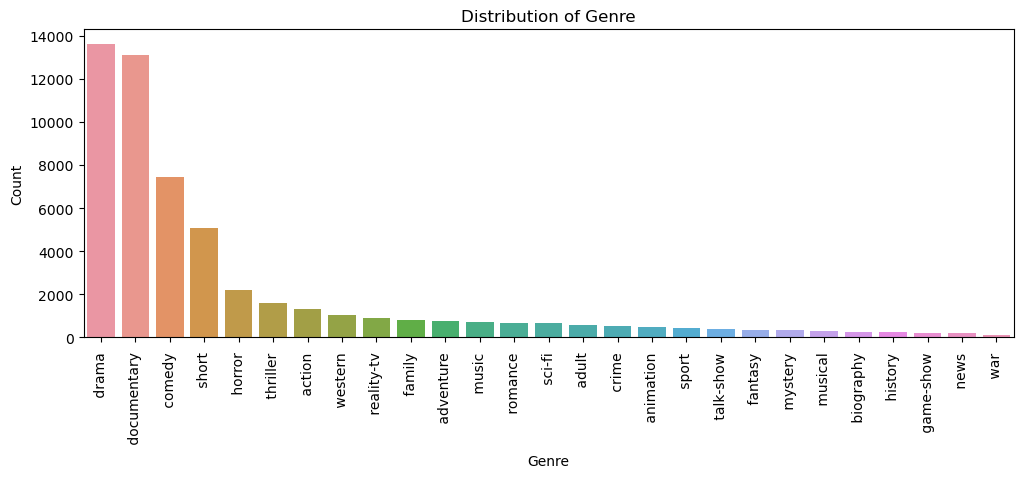

In [6]:
plt.figure(figsize=(12,4))
genre_counts = train_data.Genre.value_counts()
sns.barplot(x=genre_counts.index, y=genre_counts) 
plt.xticks(rotation = 90)
plt.title('Distribution of Genre')
plt.xlabel('Genre')
plt.ylabel('Count')

In [7]:
#length of description
train_data['length']=train_data['Description'].apply(len)
train_data.head()

,Title,Genre,Description,length
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625


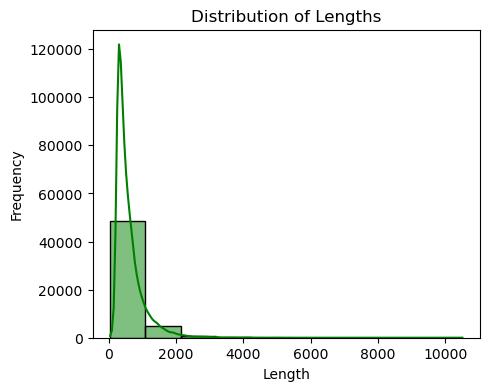

In [8]:
plt.figure(figsize=(5,4))

sns.histplot(data=train_data, x='length', bins=10, kde=True, color='green')

plt.xlabel('Length')
plt.ylabel('Frequency')
plt.title('Distribution of Lengths')

plt.show()

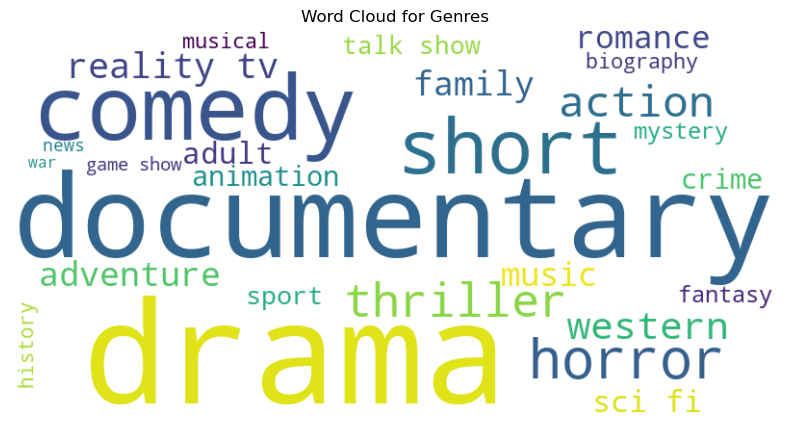

In [9]:
from wordcloud import WordCloud
genres_text = ' '.join(train_data['Genre'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(genres_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Genres')
plt.axis('off')
plt.show()

In [10]:
# import nltk
# nltk.download('punkt')

In [11]:
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
# Initialize the stemmer and stop words
stemmer = LancasterStemmer()
stop_words = set(stopwords.words('english'))


def clean_text(text):
    text = text.lower()  # Lowercase all characters
    text = re.sub(r'@\S+', '', text)  # Remove Twitter handles
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'pic.\S+', '', text)
    text = re.sub(r"[^a-zA-Z+']", ' ', text)  # Keep only characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ')  # Keep words with length > 1 only
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')  # Remove stopwords
    text = " ".join([i for i in words if i not in stopwords and len(i) > 2])
    text = re.sub("\s[\s]+", " ", text).strip()  # Remove repeated/leading/trailing spaces
    return text

# Apply the clean_text function
train_data['Text_cleaning'] = train_data['Description'].apply(clean_text)
test_data['Text_cleaning'] = test_data['Description'].apply(clean_text)

In [12]:
#length of description after cleaning
train_data['cleaned length']=train_data['Text_cleaning'].apply(len)
train_data.head()

,Title,Genre,Description,length,Text_cleaning,cleaned length
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546,listening conversation doctor parents year old...,383
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184,brother sister past incestuous relationship cu...,119
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650,bus empties students field trip museum natural...,402
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082,help unemployed father make ends meet edith tw...,745
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625,films title refers recovered bodies ground zer...,402


# Extract TF-IDF Features from Text Data

**The Below code initializes the TF-IDF vectorizer. The TF-IDF vectorizer is a tool that is used to convert text into numerical vectors. This is done by calculating the TF-IDF (term frequency-inverse document frequency) score for each word in the text. The TF-IDF score is a measure of how important a word is to a document.**

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train = tfidf_vectorizer.fit_transform(train_data['Text_cleaning'])

# Transform the test data
X_test = tfidf_vectorizer.transform(test_data['Text_cleaning'])

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
X = X_train
y = train_data['Genre']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Multinomial Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

y_pred_train = classifier.predict(X_val)
y_pred_test = classifier.predict(X_test)

accuracy_val = accuracy_score(y_val, y_pred_train)
print("Validation Accuracy:", accuracy_val)
print(classification_report(y_val, y_pred_train))

Validation Accuracy: 0.44526422576777647
               precision    recall  f1-score   support

      action        0.00      0.00      0.00       263
       adult        0.00      0.00      0.00       112
   adventure        0.00      0.00      0.00       139
   animation        0.00      0.00      0.00       104
   biography        0.00      0.00      0.00        61
      comedy        0.61      0.04      0.07      1443
       crime        0.00      0.00      0.00       107
 documentary        0.54      0.90      0.67      2659
       drama        0.38      0.88      0.53      2697
      family        0.00      0.00      0.00       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.00      0.00      0.00        40
     history        0.00      0.00      0.00        45
      horror        0.00      0.00      0.00       431
       music        0.00      0.00      0.00       144
     musical        0.00      0.00      0.00        50
     mystery        0.0

# Predictions on test data

In [16]:
y_pred_test = classifier.predict(X_test)
test_data['Predicted_Genre'] = y_pred_test

In [18]:
test_data.to_csv('predicted_genres.csv', index=False)
test_data.head(10)

,Title,Genre,Description,Text_cleaning,Predicted_Genre
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",brane loves life car apartment job especially ...,drama
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",spain march quico naughty child three belongin...,drama
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,one year life albin family shepherds north tra...,documentary
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",father died hasnt spoken brother years serious...,drama
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,known internationally martial arts superstar b...,drama
5,6,Riddle Room (2016),Emily Burns is being held captive in a room w...,emily burns held captive room idea got determi...,drama
6,7,L'amica (1969),The beautiful but neglected wife of a brillia...,beautiful neglected wife brilliant architect m...,drama
7,8,Ina Mina Dika (1989),Vasu Inamdar (Ina) suffers from a disorder wh...,vasu inamdar ina suffers disorder sees comes d...,drama
8,9,Equinox Special: Britain's Tornados (2005),An insight into the tornados that hit Kensal ...,insight tornados hit kensal rise birmingham su...,documentary
9,10,Press (2011),Press is a story of young people overwhelmed ...,press story young people overwhelmed social di...,drama
